In [1]:
%matplotlib inline
import sys
sys.path.append('/home/mehdi/github/LSSutils')
import matplotlib.pyplot as plt
import fitsio as ft
from lssutils.lab import AnaFast
import lssutils.utils as ut

In [13]:
from lssutils.dataviz import setup_color
setup_color()

In [2]:
af = AnaFast()

In [3]:
ns = 1024

def get_clss(ns):
    
    p = '/home/mehdi/data/rongpu/imaging_sys/randoms_stats/0.49.0/resolve/'
    dt = ft.read(f'{p}combined/pixmap_north_nside_{ns}_minobs_1_maskbits_1111213.fits')
    
    psfsize_g = ut.make_hp(ns, dt['HPXPIXEL'], dt['PSFSIZE_G'])
    mask = ut.make_hp(ns, dt['HPXPIXEL'], 1.0) > 0.5
    nran = ut.make_hp(ns, dt['HPXPIXEL'], 1.0)
    
    cl_ss = af(psfsize_g, nran, mask)
    return cl_ss['cl']

In [4]:
cl = {}
for ns in [128, 256, 512, 1024]:
    cl[ns] = get_clss(ns)
    print(f'{ns} done')

128 done
256 done
512 done
1024 done


(0, 1500)

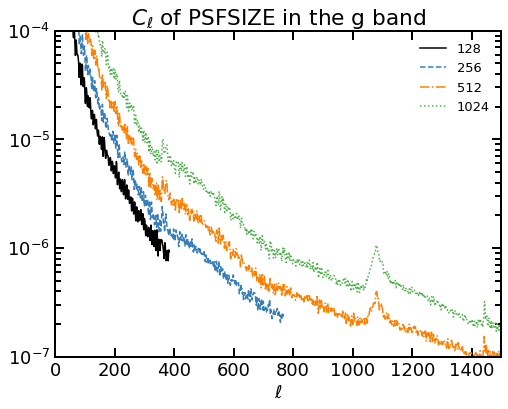

In [32]:
plt.figure(figsize=(8, 6))
plt.title(r'$C_{\ell}$ of PSFSIZE in the g band')
for i, (name, cl_i) in enumerate(cl.items()):
    plt.semilogy((2**i)*cl_i, label=name)
plt.legend()
plt.ylim(1.0e-7, 1.0e-4)
plt.xlabel(r'$\ell$')
plt.xlim(0, 1500)

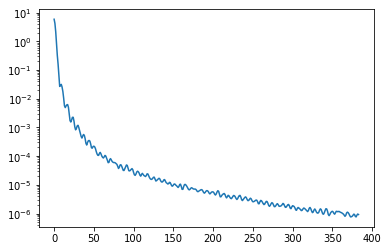

In [7]:
plt.semilogy(cl[128])

In [3]:
dt.size, 12*128**2

(24797, 196608)